# SCat Research and Developement

The goal of this notebook is to use a recurrent neural network (GRU or LSTM) to learn to extract keyword in a text. This model will be used to extract arguments in a natural language request as described below :

In [1]:
%%html
<svg height="250" width="100%"><desc>Created with Snap</desc><defs><filter id="Sje2yuzl3jnt" filterUnits="userSpaceOnUse"><feGaussianBlur in="SourceAlpha" stdDeviation="3"></feGaussianBlur><feOffset dx="0" dy="2" result="offsetblur"></feOffset><feFlood flood-color="#000000"></feFlood><feComposite in2="offsetblur" operator="in"></feComposite><feComponentTransfer><feFuncA type="linear" slope="1"></feFuncA></feComponentTransfer><feMerge><feMergeNode></feMergeNode><feMergeNode in="SourceGraphic"></feMergeNode></feMerge></filter><marker viewBox="0 0 10 10" markerWidth="10" markerHeight="10" orient="auto" refX="9" refY="3" id="arrowEndMarker"><polygon points="0,0,0,6,9,3,0,0" fill="#323232" id="arrow" style=""></polygon></marker><marker viewBox="0 0 10 10" markerWidth="10" markerHeight="10" orient="auto" refX="0" refY="3" id="arrowStartMarker"><polygon points="0,3,9,0,9,6,0,3" fill="#323232" id="startArrow" style=""></polygon></marker></defs><g id="drup_elem_1" first-frame="1" last-frame="1" class="drupElem"><text x="71.5" y="200.515625" class="core alignable sub egal-label" style="text-anchor: middle; alignment-baseline: central; font-size: 20px;" data-src="What's the weather..." transform="matrix(1,0,0,1,44,34)">What's the weather...</text></g><g id="drup_elem_2" first-frame="1" last-frame="1" class="drupElem"><text x="96.5" y="184.515625" class="core alignable sub egal-label" style="text-anchor: middle; alignment-baseline: central;"></text></g><g id="drup_elem_3" first-frame="1" last-frame="1" class="drupElem"><text x="168.5" y="159.515625" class="core alignable sub egal-label" style="text-anchor: middle; alignment-baseline: central; font-size: 20px;"></text></g><g id="drup_elem_4" first-frame="1" last-frame="1" class="drupElem"><rect x="313.5" y="54.515625" width="68" height="118" fill="#008080" stroke="#000000" vector-effect="non-scaling-stroke" style="stroke-width: 1;" class="core alignable sub" transform="matrix(1,0,0,1,-69,2)"></rect><circle cx="347.5" cy="54.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_4_endpoint_0" style="stroke-width: 1; opacity: 0;" class="endPoint up sub" transform="matrix(1,0,0,1,-69,2)"></circle><circle cx="347.5" cy="172.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_4_endpoint_1" style="stroke-width: 1; opacity: 0;" class="endPoint down sub" transform="matrix(1,0,0,1,-69,2)"></circle><circle cx="313.5" cy="113.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_4_endpoint_2" style="stroke-width: 1; opacity: 0;" class="endPoint left sub" transform="matrix(1,0,0,1,-69,2)"></circle><circle cx="381.5" cy="113.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_4_endpoint_3" style="stroke-width: 1; opacity: 0;" class="endPoint right sub" transform="matrix(1,0,0,1,-69,2)"></circle><circle cx="313.5" cy="54.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_4_endpoint_4" style="stroke-width: 1; opacity: 0;" class="endPoint left-up sub" transform="matrix(1,0,0,1,-69,2)"></circle><circle cx="313.5" cy="172.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_4_endpoint_5" style="stroke-width: 1; opacity: 0;" class="endPoint left-down sub" transform="matrix(1,0,0,1,-69,2)"></circle><circle cx="381.5" cy="54.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_4_endpoint_6" style="stroke-width: 1; opacity: 0;" class="endPoint right-up sub" transform="matrix(1,0,0,1,-69,2)"></circle><circle cx="381.5" cy="172.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_4_endpoint_7" style="stroke-width: 1; opacity: 0;" class="endPoint right-down sub" transform="matrix(1,0,0,1,-69,2)"></circle><text x="347.5" y="113.515625" style="font-size: 20px; text-anchor: middle; alignment-baseline: central; opacity: 0;" class="egal-label sub" transform="matrix(1,0,0,1,-69,2)">|</text></g><g id="drup_elem_5" first-frame="1" last-frame="1" class="drupElem"><rect x="434.5" y="56.515625" width="71" height="113" fill="#008080" stroke="#000000" vector-effect="non-scaling-stroke" style="stroke-width: 1;" class="core alignable sub" transform="matrix(0.9578,0,0,1.0442,-42.6409,-3.5007)"></rect><circle cx="470" cy="56.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_5_endpoint_0" style="stroke-width: 1; opacity: 0;" class="endPoint up sub" transform="matrix(1,0,0,1,-62.4982,-1)"></circle><circle cx="470" cy="169.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_5_endpoint_1" style="stroke-width: 1; opacity: 0;" class="endPoint down sub" transform="matrix(1,0,0,1,-62.4982,4)"></circle><circle cx="434.5" cy="113.015625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_5_endpoint_2" style="stroke-width: 1; opacity: 0;" class="endPoint left sub" transform="matrix(1,0,0,1,-60.9984,1.5)"></circle><circle cx="505.5" cy="113.015625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_5_endpoint_3" style="stroke-width: 1; opacity: 0;" class="endPoint right sub" transform="matrix(1,0,0,1,-63.9981,1.5)"></circle><circle cx="434.5" cy="56.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_5_endpoint_4" style="stroke-width: 1; opacity: 0;" class="endPoint left-up sub" transform="matrix(1,0,0,1,-60.9984,-1)"></circle><circle cx="434.5" cy="169.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_5_endpoint_5" style="stroke-width: 1; opacity: 0;" class="endPoint left-down sub" transform="matrix(1,0,0,1,-60.9984,4)"></circle><circle cx="505.5" cy="56.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_5_endpoint_6" style="stroke-width: 1; opacity: 0;" class="endPoint right-up sub" transform="matrix(1,0,0,1,-63.9981,-1)"></circle><circle cx="505.5" cy="169.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_5_endpoint_7" style="stroke-width: 1; opacity: 0;" class="endPoint right-down sub" transform="matrix(1,0,0,1,-63.9981,4)"></circle><text x="470" y="113.015625" style="font-size: 20px; text-anchor: middle; alignment-baseline: central; opacity: 0;" class="egal-label sub" transform="matrix(1,0,0,1,-62.4976,1.5)">|</text></g><g id="drup_elem_6" first-frame="1" last-frame="1" class="drupElem"><rect x="545.5" y="57.515625" width="72" height="109" fill="#008080" stroke="#000000" vector-effect="non-scaling-stroke" style="stroke-width: 1;" class="core alignable sub" transform="matrix(0.9444,0,0,1.0825,-9.6944,-6.7492)"></rect><circle cx="581.5" cy="57.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_6_endpoint_0" style="stroke-width: 1; opacity: 0;" class="endPoint up sub" transform="matrix(1,0,0,1,-42,-2.0001)"></circle><circle cx="581.5" cy="166.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_6_endpoint_1" style="stroke-width: 1; opacity: 0;" class="endPoint down sub" transform="matrix(1,0,0,1,-42,7)"></circle><circle cx="545.5" cy="112.015625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_6_endpoint_2" style="stroke-width: 1; opacity: 0;" class="endPoint left sub" transform="matrix(1,0,0,1,-40,2.5)"></circle><circle cx="617.5" cy="112.015625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_6_endpoint_3" style="stroke-width: 1; opacity: 0;" class="endPoint right sub" transform="matrix(1,0,0,1,-44,2.5)"></circle><circle cx="545.5" cy="57.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_6_endpoint_4" style="stroke-width: 1; opacity: 0;" class="endPoint left-up sub" transform="matrix(1,0,0,1,-40,-2.0001)"></circle><circle cx="545.5" cy="166.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_6_endpoint_5" style="stroke-width: 1; opacity: 0;" class="endPoint left-down sub" transform="matrix(1,0,0,1,-40,7)"></circle><circle cx="617.5" cy="57.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_6_endpoint_6" style="stroke-width: 1; opacity: 0;" class="endPoint right-up sub" transform="matrix(1,0,0,1,-44,-2.0001)"></circle><circle cx="617.5" cy="166.515625" r="5" stroke="#000000" fill="#ffffff" id="drup_elem_6_endpoint_7" style="stroke-width: 1; opacity: 0;" class="endPoint right-down sub" transform="matrix(1,0,0,1,-44,7)"></circle><text x="581.5" y="112.015625" style="font-size: 20px; text-anchor: middle; alignment-baseline: central; opacity: 0;" class="egal-label sub" transform="matrix(1,0,0,1,-41.9991,2.5)">|</text></g><g id="drup_elem_7" first-frame="1" last-frame="1" class="drupElem"><line x1="312.5" x2="373.50160000000005" y1="115.515625" y2="114.515625" stroke="#000000" data-n1="drup_elem_4_endpoint_3" style="marker-end: url(&quot;#arrowEndMarker&quot;);" class="connector egal-line core" data-n2="drup_elem_5_endpoint_2"></line><text x="343.00079345703125" y="115.015625" style="font-size: 20px; text-anchor: middle; alignment-baseline: central; opacity: 0;" class="egal-label sub">|</text></g><g id="drup_elem_8" first-frame="1" last-frame="1" class="drupElem"><line x1="441.5019" x2="505.5" y1="114.515625" y2="114.515625" stroke="#000000" data-n1="drup_elem_5_endpoint_3" style="marker-end: url(&quot;#arrowEndMarker&quot;);" class="connector egal-line core" data-n2="drup_elem_6_endpoint_2"></line><text x="473.5009460449219" y="114.515625" style="font-size: 20px; text-anchor: middle; alignment-baseline: central; opacity: 0;" class="egal-label sub">|</text></g><g id="drup_elem_9" first-frame="1" last-frame="1" class="drupElem"><text x="263.5" y="255.515625" class="core alignable sub egal-label" style="text-anchor: middle; alignment-baseline: central; font-size: 20px;" data-src="in" transform="matrix(1,0,0,1.1359,15,-88.2423)">in</text></g><g id="drup_elem_10" first-frame="1" last-frame="1" class="drupElem"><text x="407.5" y="215.515625" class="core alignable sub egal-label" style="text-anchor: middle; alignment-baseline: central; font-size: 20px;" data-src="new" transform="matrix(1,0,0,1,0,-13)">new</text></g><g id="drup_elem_11" first-frame="1" last-frame="1" class="drupElem"><text x="542.5" y="223.515625" class="core alignable sub egal-label" style="text-anchor: middle; alignment-baseline: central; font-size: 20px;" data-src="york" transform="matrix(1,0,0,1,-2,-19)">york</text></g><g id="drup_elem_12" first-frame="1" last-frame="1" class="drupElem"><text x="284.5" y="41.515625" class="core alignable sub egal-label" style="text-anchor: middle; alignment-baseline: central; font-size: 20px;" data-src="0.02" transform="matrix(1,0,0,1,-7,-11)">0.02</text></g><g id="drup_elem_13" first-frame="1" last-frame="1" class="drupElem"><text x="406.5" y="45.515625" class="core alignable sub egal-label" style="text-anchor: middle; alignment-baseline: central; font-size: 20px;" data-src="0.98" transform="matrix(1,0,0,1,0,-15)">0.98</text></g><g id="drup_elem_14" first-frame="1" last-frame="1" class="drupElem egal-select"><text x="526.5" y="38.515625" class="core alignable sub egal-label" style="text-anchor: middle; alignment-baseline: central; font-size: 20px;" data-src="0.93" transform="matrix(1,0,0,1,14,-10)">0.93</text></g></svg>

Each teal square represent a recurrent neural network unit, each unit take a word as the input and return the probability of the word being an "argument", here a city.

To achieve this, the text input has to be tokenized and each word as to be transformed into a vector.


Usually, the word vector need to be calculated using something like GloVe or Word2Vec but, as the Kadot Pytorch implementation of CBOW isn't available yet we will use a simple 1-hot encoding.

In [2]:
import torch

tokenizer = lambda text: text.split()

def vectorizer(tokens):
    vocabulary = list(set(tokens))
    embedding = dict()
    
    for word_index, word in enumerate(vocabulary):
        word_vec = torch.zeros(len(vocabulary))
        word_vec[word_index] = 1
        embedding[word] = word_vec
        
    return embedding

Now let's write the model, I will use a simple GRU cell as the encoder and a raw non-recurrent layer activated by softmax as the decoder.

In [3]:
from torch import nn
from torch.autograd import Variable


class SCatCell(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SCatCell, self).__init__()
        self.hidden_size = hidden_size
        
        self.encoder = nn.GRUCell(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, output_size)
        
    def forward(self, input, hidden):
        next_hidden_state = self.encoder(input, hidden)
        output = self.decoder(next_hidden_state.view(self.hidden_size))
        
        return next_hidden_state, output
    
    def init_hidden(self):
        return Variable(torch.zeros(1, self.hidden_size))


Now we just need to prepare a simple dataset and train the model !

The dataset is a simple collection of only six weather question, the goal is for the network to identify the city in the sentence like in a supervised classifcation problem.

In [4]:
train_x = [
    "What is the weather like in Paris ?",
    "What kind of weather will it do in London ?",
    "Give me the weather forecast in Berlin please .",
    "Tell me the forecast in New York !",
    "Give me the weather in San Francisco ...",
    "I want the forecast in Dublin .",
    "I want the forecast in"  # Try to reduce the detection of "in" as a city
]
train_y = [
    ('Paris'),
    ('London'),
    ('Berlin'),
    ('New', 'York'),
    ('San', 'Francisco'),
    ('Dublin'),
    ()
]

Finally, train the model !

In [5]:
from torch import optim

learning_rate = 0.001
n_epoch = 2000

embeddings = vectorizer(tokenizer(' '.join(train_x + ['Los', 'Angeles']))) # add a city not in the training set for testing

model = SCatCell(len(embeddings), 10, 1)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss = nn.MSELoss()

for epoch in range(n_epoch):    
    for s_x, s_y in zip([tokenizer(t) for t in train_x], train_y):
        hidden_state = model.init_hidden()
        
        ys = Variable(torch.FloatTensor([0]))
        preds = Variable(torch.FloatTensor([0]), requires_grad=True)
        for word in s_x:
            word_vec = Variable(embeddings[word].view(1, len(embeddings)))
            word_y = Variable(torch.FloatTensor([int(word in s_y)]))
            
            hidden_state, pred = model(word_vec, hidden_state)

            ys = torch.cat((ys, word_y), 0)
            preds = torch.cat((preds, pred), 0)
        
        
        error = loss(preds, ys)
        error.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % 200 == 0:
        print("Epoch {} - Loss: {}".format(epoch, round(float(error), 4)))

Epoch 0 - Loss: 0.0049
Epoch 200 - Loss: 0.0315
Epoch 400 - Loss: 0.0308
Epoch 600 - Loss: 0.0308
Epoch 800 - Loss: 0.0308
Epoch 1000 - Loss: 0.0307
Epoch 1200 - Loss: 0.0307
Epoch 1400 - Loss: 0.0307
Epoch 1600 - Loss: 0.0307
Epoch 1800 - Loss: 0.0307


Learning seems to follow a strange curve but... let's check a training sample !

In [6]:
x = "the forecast in Los Angeles please"
s_x = tokenizer(x)
hidden_state = model.init_hidden()
preds = []

for word in s_x:
    word_vec = Variable(embeddings[word].view(1, len(embeddings)))
    hidden_state, pred = model(word_vec, hidden_state)
    preds.append(float(pred))
    
    print(word, float(pred))

the -0.06132287532091141
forecast -0.04271900653839111
in 0.45391690731048584
Los 0.8922172784805298
Angeles 0.6652529239654541
please 0.11056838184595108


<Container object of 6 artists>

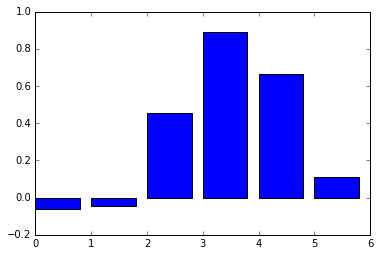

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.bar(range(6), preds)

Results are encouraging, the result given is exactly what I wanted to see.